In [15]:
##Machine Learning code example
import os, re
from PIL import Image
import numpy as np

path = os.path.join(os.getcwd(), 'car')

##Clear the document
try:
    os.remove(os.path.join(path, '.DS_Store'))
    print('remove file success')
except:
    print('no file to be removed')
    
allDir = os.listdir(path)

##Create brand list for labeling
brand = []
for d in allDir:
    for f in os.listdir(os.path.join(path, d)):
        tmp = re.split(r'[0-9]+_',f)
        if not tmp[0] in brand:
            brand.append(tmp[0])
brand = sorted(brand)
print(brand)

def labeling(b):
    zList = np.zeros(len(brand))
    ind = brand.index(b)
    zList[ind] = 1
    return zList

def load_data(path):
    data = []
    for f in os.listdir(path):
        tmpFileName = re.split(r'[0-9]+_',f)
        label = labeling(tmpFileName[0])
        tmpImg = Image.open(os.path.join(path,f)).convert('RGB')
        data.append([np.array(tmpImg)/255, label]) #np.array(data)/255 => normalize the values of the pixels to be between 0 and 1 instead of 0 to 255
    return data

trainData = load_data(os.path.join(path, 'train'))
testData = load_data(os.path.join(path, 'test'))

trainImg = np.array([i[0] for i in trainData])
trainLabel = np.array([i[1] for i in trainData])
print(f'Train data shape : \n{trainImg.shape}\nTrain label shape: \n{trainLabel.shape}')
print(f'Train data : \n{trainImg}\nTrain label : \n{trainLabel}')

remove file success
['Alfa Romeo', 'Audi', 'BMW', 'Chevrolet', 'Citroen', 'Dacia', 'Daewoo', 'Dodge', 'Ferrari', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Kia', 'Lada', 'Lancia', 'Land Rover', 'Lexus', 'Maserati', 'Mazda', 'Mercedes', 'Mitsubishi', 'Nissan', 'Opel', 'Peugeot', 'Porsche', 'Renault', 'Rover', 'Saab', 'Seat', 'Skoda', 'Subaru', 'Suzuki', 'Tata', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo']
Train data shape : 
(18717, 50, 50, 3)
Train label shape: 
(18717, 40)
Train data : 
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.       

In [27]:
##Machine Learning proccess
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras import backend

def build_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), strides=1, padding='valid', activation = 'relu', input_shape = (50, 50, 3)))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(3, 3), strides=1, padding='valid', activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(len(brand), activation = 'softmax'))
    return model

model = build_model()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
trainImg1 = backend.cast_to_floatx(trainImg)
trainLabel1 = backend.cast_to_floatx(trainLabel)
model.fit(trainImg1, trainLabel1, batch_size = 20,  epochs = 20)
# 將模型儲存至 HDF5 檔案中
model.save('./car_brand_model.h5')  # creates a HDF5 file 

Epoch 1/20
936/936 [==============================] - 43s 46ms/step - loss: 2.5070 - accuracy: 0.4101
Epoch 2/20
936/936 [==============================] - 39s 42ms/step - loss: 1.2906 - accuracy: 0.6821
Epoch 3/20
936/936 [==============================] - 39s 42ms/step - loss: 0.8298 - accuracy: 0.7869
Epoch 4/20
936/936 [==============================] - 42s 45ms/step - loss: 0.5489 - accuracy: 0.8528
Epoch 5/20
936/936 [==============================] - 45s 48ms/step - loss: 0.3702 - accuracy: 0.8999
Epoch 6/20
936/936 [==============================] - 44s 47ms/step - loss: 0.3096 - accuracy: 0.9162
Epoch 7/20
936/936 [==============================] - 42s 44ms/step - loss: 0.2467 - accuracy: 0.9356
Epoch 8/20
936/936 [==============================] - 39s 42ms/step - loss: 0.2072 - accuracy: 0.9426
Epoch 9/20
936/936 [==============================] - 38s 40ms/step - loss: 0.1868 - accuracy: 0.9509
Epoch 10/20
936/936 [==============================] - 38s 40ms/step - loss: 0.160

In [28]:
##Show the train model accuracy result
score = model.evaluate(trainImg1, trainLabel1)
print('\nTrain Acc:' + str(score[1]*100) + '%')

testImg = np.array([i[0] for i in testData])
testLabel = np.array([i[1] for i in testData])

testImg1 = backend.cast_to_floatx(testImg)
testLabel1 = backend.cast_to_floatx(testLabel)

score = model.evaluate(testImg1, testLabel1)
print('\nTest Acc: ' + str(score[1]*100) + '%')

585/585 [==============================] - 9s 15ms/step - loss: 0.0322 - accuracy: 0.9917

Train Acc:99.16653037071228%
65/65 [==============================] - 1s 15ms/step - loss: 2.1397 - accuracy: 0.7899

Test Acc: 78.99078130722046%


(50, 50, 3)
[2.2447250e-21 3.7522881e-28 8.7151797e-29 2.6130122e-28 7.2330651e-33
 1.1636937e-24 1.4878630e-26 6.2750403e-27 1.0535565e-19 9.8065823e-31
 9.8366880e-27 0.0000000e+00 1.7953010e-26 2.6788671e-29 7.2707689e-26
 4.0503165e-32 4.5187890e-29 2.8273084e-31 9.0910334e-19 9.5079023e-33
 6.9590563e-31 8.0955784e-19 4.1752863e-32 1.5119197e-29 6.2891777e-35
 2.4795188e-25 7.2014716e-22 1.2390309e-21 2.3114813e-19 6.7962946e-31
 6.8090340e-24 1.8724573e-28 1.0000000e+00 9.5229393e-31 1.7424156e-20
 1.0316143e-36 3.0065102e-31 2.1371245e-21 6.0130391e-22 2.9445186e-36]
32
Skoda 100.0


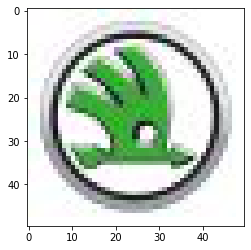

In [29]:
##Test model accuracy with out of training data
import matplotlib.pyplot as plt
from PIL import Image

realImg = Image.open('./Skoda.jpg').convert('RGB')
realImg.size
realImg = np.array(realImg)/255
print(realImg.shape)

result = model.predict(np.array(realImg).reshape(-1, 50, 50, 3))
print(result[0])
preIndex = np.argmax(result[0])
print(preIndex)
print(brand[preIndex], result[0][preIndex]*100)
plt.imshow(realImg)